In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x1 = np.random.normal(0, 5, 1000)
x2 = np.random.normal(0, 1, 1000)

In [3]:
df = pd.DataFrame({
    'x1': x1, 
    'x2': x2
})

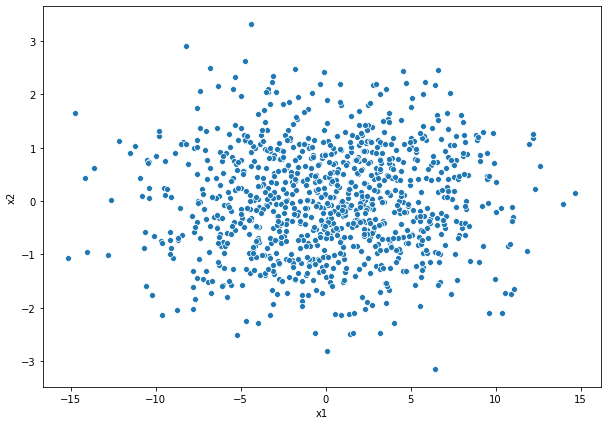

In [4]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='x1', y='x2', data=df)

In [17]:
def mahalanobis_distance(p, q, df):
    A = p - q
    B = (p - q).T
    covariance_matrix = np.array(df.cov())
    inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
    return np.dot(np.dot(A, inverse_covariance_matrix), B)

In [6]:
def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

In [18]:
df

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335
...,...,...,...
53935,0.72,60.8,2757
53936,0.72,63.1,2757
53937,0.70,62.8,2757
53938,0.86,61.0,2757


In [8]:
x1_min_arg = x1[np.argsort(x1)[0]]
x1_max_arg = x1[np.argsort(x1)[-1]]
x2_min_arg, x2_max_arg = x2[np.where((x2 > np.mean(x2) - .2) & (x2 < np.mean(x2) + .2))[0][0:2]]

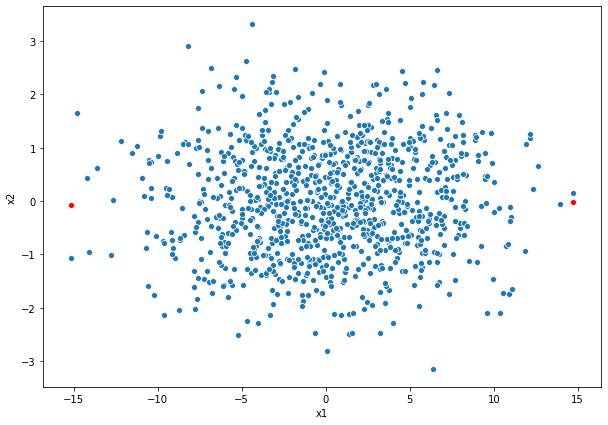

In [9]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='x1', y='x2', data=df)
sns.scatterplot(x=[x1_min_arg, x1_max_arg], y=[x2_min_arg, x2_max_arg], color='red')

In [10]:
p = np.array([[x1_min_arg, x2_min_arg]])
q = np.array([[x1_max_arg, x2_max_arg]])

In [11]:
euclidean_distance(p, q)

29.837143242025203

In [12]:
mahalanobis_distance(p, q, df)

array([[35.75483822]])

In [13]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:, [0,4,6]]

In [14]:
df.head(3)

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327


In [15]:
df.iloc[11].values

array([2.30e-01, 6.28e+01, 3.40e+02])

In [16]:
mahalanobis_distance(df.iloc[10].values, df.iloc[11].values, df)

0.7919318634752811